In [1]:
#setup
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
from mpl_toolkits import mplot3d
plotly.tools.set_credentials_file(username='xavier2696', api_key='97cuXMXYTejnMxo9gpIk')
import re
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#keys
origin_time_key = 'Origin Time'
epicenter_longitude_key = 'EpicenterLongitude'
epicenter_latitude_key = 'EpicenterLatitude'
depth_key = 'Depth'
magnitude_key = 'Magnitude'
station_code_key = 'StationCode'
station_name_key = 'StationName'
station_longitude_key = 'StationLongitude'
station_latitude_key = 'StationLatitude'
instrument_kind_key = 'InstrumentKind'
start_time_key = 'StartTime'
record_length_key = 'RecordLength'
sample_rate_key = 'SampleRate'
amplitude_unit_key = 'AmplitudeUnit'
amplitude_max_u_key = 'AmplitudeMAX. U'
amplitude_max_n_key = 'AmplitudeMAX. N'
amplitude_max_e_key = 'AmplitudeMAX. E'

earthquake_column_names_dict = {origin_time_key: 'origin_time',
                               epicenter_longitude_key: 'epicenter_longitude',
                               epicenter_latitude_key: 'epicenter_latitude',
                               depth_key: 'depth',
                               magnitude_key: 'magnitude',
                               station_code_key: 'station_code',
                               station_name_key: 'station_name',
                               station_longitude_key: 'station_longitude',
                               station_latitude_key: 'station_latitude',
                               instrument_kind_key: 'instrument_kind',
                               start_time_key: 'start_time',
                               record_length_key: 'record_length',
                               sample_rate_key: 'sample_rate',
                               amplitude_unit_key: 'amplitude_unit',
                               amplitude_max_u_key: 'amplitude_max_u',
                               amplitude_max_n_key: 'amplitude_max_n',
                               amplitude_max_e_key: 'amplitude_max_e'}

earthquake_keys = [origin_time_key, epicenter_longitude_key, epicenter_latitude_key, depth_key, magnitude_key, \
                  station_code_key, station_name_key, station_longitude_key, station_latitude_key, \
                   instrument_kind_key, start_time_key, record_length_key, sample_rate_key, amplitude_unit_key, \
                  amplitude_max_u_key, amplitude_max_n_key, amplitude_max_e_key]

In [4]:
#method for creating a dictionary with the lines of the file
def earthquake_dict(lines_array):
    earthquake = {}
    
    readData_flag = 0
    time = []
    ux = []
    nx = []
    ex = []
    i = 0
    for line in earthquake_array:
        i += 1
        if ':' in line:
            for key in earthquake_keys:
                if key in line:
                    if '~' in line:
                        range_string = line.split(': ')[1]
                        lower = (range_string.split('~')[1]).strip()
                        upper = (range_string.split('~')[0]).strip()
                        earthquake[earthquake_column_names_dict[key] + '_lower'] = float(lower)
                        earthquake[earthquake_column_names_dict[key] + '_upper'] = float(upper)
                    else:
                        try:
                            value = float((line.split(': ')[1]).strip())
                            earthquake[earthquake_column_names_dict[key]] = value
                        except ValueError:
                            earthquake[earthquake_column_names_dict[key]] = (line.split(': ')[1]).strip()
        if readData_flag == 1:
            if line != '':
                try:
                    t, u, n, e = line.split()
                except:
                    break
                time.append(t)
                ux.append(u)
                nx.append(n)
                ex.append(e)
        if 'ata' in line and 'equ' not in line:
            readData_flag = 1
    
    earthquake['time'] = np.asarray(time, dtype=np.float64)
    earthquake['ua'] = np.asarray(ux, dtype=np.float64)
    earthquake['na'] = np.asarray(nx, dtype=np.float64)
    earthquake['ea'] = np.asarray(ex, dtype=np.float64)
    return earthquake

In [5]:
#add data for the earthquakes
#get files for eq_cwb directory
earthquakes = []
for directory in os.listdir(os.getcwd() + '/data/earthquake/eq_cwb/2017ASCII'):
    path = os.getcwd() + '/data/earthquake/eq_cwb/2017ASCII/' + directory
    if os.path.isdir(path):
        for file in os.listdir(path):
            with open(path + '/' + file,"r") as file:
                earthquake_array = [string for string in file.read().split('\n')]
                earthquakes += [earthquake_dict(earthquake_array)]

for directory in os.listdir(os.getcwd() + '/data/earthquake/eq_cwb/2018_001-130'):
    path = os.getcwd() + '/data/earthquake/eq_cwb/2018_001-130/' + directory
    for directory_inner in os.listdir(path):
        path_inner = os.getcwd() + '/data/earthquake/eq_cwb/2018_001-130/' + directory + '/' + directory_inner
        if os.path.isdir(path_inner):
            for file in os.listdir(path_inner):
                with open(path_inner + '/' + file,"r") as file:
                    earthquake_array = [string for string in file.read().split('\n')]
                    earthquakes += [earthquake_dict(earthquake_array)]
                
#get files for eq_ncree directory
for directory in os.listdir(os.getcwd() + '/data/earthquake/eq_ncree/106'):
    path = os.getcwd() + '/data/earthquake/eq_ncree/106/' + directory
    if os.path.isdir(path):
        for file in os.listdir(path):
            with open(path + '/' + file, encoding='big5') as file:
                earthquake_array = [string for string in file.read().split('\n')]
                earthquakes += [earthquake_dict(earthquake_array)]

#get files for eq_ncree directory
for directory in os.listdir(os.getcwd() + '/data/earthquake/eq_ncree/107'):
    path = os.getcwd() + '/data/earthquake/eq_ncree/107/' + directory
    if os.path.isdir(path):
        for file in os.listdir(path):
            with open(path + '/' + file, encoding='big5') as file:
                earthquake_array = [string for string in file.read().split('\n')]
                earthquakes += [earthquake_dict(earthquake_array)]
                
earthquake_df = pd.DataFrame.from_dict(earthquakes)
print('Length:', len(earthquake_df))

Length: 7233


In [6]:
print('Length unique earthquakes:', len(earthquake_df.start_time.unique()))

Length unique earthquakes: 1686


In [7]:
earthquake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7233 entries, 0 to 7232
Data columns (total 24 columns):
amplitude_max_e_lower    7233 non-null float64
amplitude_max_e_upper    7233 non-null float64
amplitude_max_n_lower    7233 non-null float64
amplitude_max_n_upper    7233 non-null float64
amplitude_max_u_lower    7233 non-null float64
amplitude_max_u_upper    7233 non-null float64
amplitude_unit           7233 non-null object
depth                    7233 non-null float64
ea                       7233 non-null object
epicenter_latitude       7233 non-null float64
epicenter_longitude      7233 non-null float64
instrument_kind          7233 non-null object
magnitude                7233 non-null float64
na                       7233 non-null object
origin_time              7233 non-null object
record_length            7233 non-null float64
sample_rate              7233 non-null float64
start_time               7233 non-null object
station_code             7233 non-null object
station

In [8]:
earthquake_df.to_pickle('data/earthquake/earthquakes_withData.pkl')

In [9]:
tainan_station = pd.DataFrame()

tainan_station = earthquake_df[(earthquake_df.station_latitude > 22.867997138821966) & 
                               (earthquake_df.station_latitude < 23.42151168812283) &
                               (earthquake_df.station_longitude > 120.0206129877014) &
                               (earthquake_df.station_longitude < 120.66239894252767)]

In [10]:
tainan_station.to_pickle('data/earthquake/earthquakes_Tainan_withData.pkl')

---

In [15]:
tainan_station = pd.read_pickle("data/earthquake/earthquakes_Tainan_withData.pkl")

In [11]:
tainan_station.head()

,amplitude_max_e_lower,amplitude_max_e_upper,amplitude_max_n_lower,amplitude_max_n_upper,amplitude_max_u_lower,amplitude_max_u_upper,amplitude_unit,depth,ea,epicenter_latitude,...,origin_time,record_length,sample_rate,start_time,station_code,station_latitude,station_longitude,station_name,time,ua
55,-4.606,3.410,-6.640,10.587,-0.658,0.658,gal. DCoffset(corr),24.9,"[0.0, 0.0, 0.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",23.28,...,2017/05/16-07:12:54,120.0,50.0,2017/05/16-07:12:48.000,SCK,23.147,120.086,Qigu,"[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
58,-2.393,2.452,-2.692,3.051,-1.436,1.555,gal. DCoffset(corr),24.9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",23.28,...,2017/05/16-07:12:54,120.0,50.0,2017/05/16-07:12:48.000,SGS,23.080,120.591,Jiaxian,"[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
62,-12.920,9.451,-15.433,13.399,-1.794,1.914,gal. DCoffset(corr),24.9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",23.28,...,2017/05/16-07:12:54,120.0,50.0,2017/05/16-07:12:48.000,SSH,23.136,120.288,Shanhua,"[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
66,-3.290,4.725,-6.041,5.264,-1.196,1.376,gal. DCoffset(corr),24.9,"[-0.06, 0.0, 0.0, 0.0, -0.06, -0.06, -0.06, -0...",23.28,...,2017/05/16-07:12:54,120.0,50.0,2017/05/16-07:12:48.000,TAI1,23.038,120.237,Yongkang,"[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,...","[0.0, 0.0, 0.0, 0.0, 0.06, 0.0, -0.06, 0.0, 0...."
81,-9.571,8.673,-9.331,11.425,-3.110,2.752,gal. DCoffset(corr),24.9,"[-0.06, 0.0, 0.0, 0.0, -0.06, -0.06, 0.0, 0.0,...",23.28,...,2017/05/16-07:12:54,120.0,50.0,2017/05/16-07:12:48.000,CHN4,23.351,120.594,Caoshan,"[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [12]:
tainan_station.size

15960

In [13]:
tainan_station.instrument_kind.unique()

array(['FBA', 'Kinemetrics', 'TOKYO SOKUSHIN'], dtype=object)

In [14]:
tainan_station.reset_index(inplace=True)

In [15]:
tainan_station.iloc[176]

index                                                                 1287
amplitude_max_e_lower                                             -139.133
amplitude_max_e_upper                                               89.366
amplitude_max_n_lower                                             -353.574
amplitude_max_n_upper                                              221.978
amplitude_max_u_lower                                              -93.254
amplitude_max_u_upper                                              164.016
amplitude_unit                                         gal. DCoffset(corr)
depth                                                                 16.2
ea                       [0.0, 0.0, -0.06, 0.0, 0.0, -0.06, -0.06, 0.0,...
epicenter_latitude                                                   22.87
epicenter_longitude                                                 120.14
instrument_kind                                                        FBA
magnitude                

In [16]:
tainan_station.amplitude_max_n_lower.idxmin()

176

In [21]:
from scipy import integrate

def IntergrateTime(time, acc):
    dt = time[1] - time[0]

    for i in range(len(acc)):
        if acc[i] != 0:
            correction_time = i
            break
        else:
            correction_time = 0
    
    dummy_time = time[correction_time:]
    dummy_acc = acc[correction_time:]
    
    # Least squares fit through acceleration history
    acc_fit = np.polyfit(dummy_time, dummy_acc, 1);
    cor_factor = np.polyval(acc_fit, dummy_time);
    acc_cor = dummy_acc - cor_factor;

    # Integrate for velocity
    velocity = integrate.cumtrapz(dummy_time, acc_cor, initial=0) *dt;

    # Least squares fit through velocity history
    vel_fit = np.polyfit(dummy_time, velocity, 1);
    vel_cor = acc_cor - vel_fit[0];

    # Corrected velocity
    vel_cor = integrate.cumtrapz(dummy_time, acc_cor, initial=0) *dt;

    # Corrected displacement
    dis_cor = integrate.cumtrapz(dummy_time, vel_cor, initial=0) *dt;
    
    acc_cor = np.append([0] * correction_time ,acc_cor)
    vel_cor = np.append([0] * correction_time ,vel_cor)
    dis_cor = np.append([0] * correction_time ,dis_cor)
    return acc_cor, vel_cor, dis_cor

In [22]:
e_PGA = []
e_PGV = []
e_PGD = []

n_PGA = []
n_PGV = []
n_PGD = []

u_PGA = []
u_PGV = []
u_PGD = []
for i in range(tainan_station.shape[0]):
    time = tainan_station.iloc[i].time
    
    acc = tainan_station.iloc[i].ea
    a, v, u = IntergrateTime(time, acc)
    e_PGA.append( np.absolute(a).max() )
    e_PGV.append( np.absolute(v).max() )
    e_PGD.append( np.absolute(u).max() )
    
    acc = tainan_station.iloc[i].na
    a, v, u = IntergrateTime(time, acc)
    n_PGA.append( np.absolute(a).max() )
    n_PGV.append( np.absolute(v).max() )
    n_PGD.append( np.absolute(u).max() )
    
    acc = tainan_station.iloc[i].ua
    a, v, u = IntergrateTime(time, acc)
    u_PGA.append( np.absolute(a).max() )
    u_PGV.append( np.absolute(v).max() )
    u_PGD.append( np.absolute(u).max() )

In [52]:
tainan_station['e_PGA'] = e_PGA
tainan_station['e_PGV'] = e_PGV
tainan_station['e_PGD'] = e_PGD

tainan_station['n_PGA'] = n_PGA
tainan_station['n_PGV'] = n_PGV
tainan_station['n_PGD'] = n_PGD

tainan_station['u_PGA'] = u_PGA
tainan_station['u_PGV'] = u_PGV
tainan_station['u_PGD'] = u_PGD

In [24]:
tainan_station.head()

,index,amplitude_max_e_lower,amplitude_max_e_upper,amplitude_max_n_lower,amplitude_max_n_upper,amplitude_max_u_lower,amplitude_max_u_upper,amplitude_unit,depth,ea,...,ua,e_PGA,e_PGV,e_PGD,n_PGA,n_PGV,n_PGD,u_PGA,u_PGV,u_PGD
0,55,-4.606,3.410,-6.640,10.587,-0.658,0.658,gal. DCoffset(corr),24.9,"[0.0, 0.0, 0.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.628052,4.687218,6.478251,10.563145,10.603392,10.643400,0.690667,1.434567,2.973917
1,58,-2.393,2.452,-2.692,3.051,-1.436,1.555,gal. DCoffset(corr),24.9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.458348,1.965462,1.606147,3.037962,2.348394,1.838612,1.540904,1.145861,0.946072
2,62,-12.920,9.451,-15.433,13.399,-1.794,1.914,gal. DCoffset(corr),24.9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",12.917770,12.114708,11.328676,15.395914,14.245179,15.105063,1.905965,2.462718,3.772364
3,66,-3.290,4.725,-6.041,5.264,-1.196,1.376,gal. DCoffset(corr),24.9,"[-0.06, 0.0, 0.0, 0.0, -0.06, -0.06, -0.06, -0...",...,"[0.0, 0.0, 0.0, 0.0, 0.06, 0.0, -0.06, 0.0, 0....",4.755222,5.613920,6.630136,6.019531,6.965000,8.051104,1.380711,1.986864,2.860498
4,81,-9.571,8.673,-9.331,11.425,-3.110,2.752,gal. DCoffset(corr),24.9,"[-0.06, 0.0, 0.0, 0.0, -0.06, -0.06, 0.0, 0.0,...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9.543887,7.367929,5.688361,11.477485,8.968399,7.010468,3.081063,2.162007,1.644548


In [25]:
tainan_station.to_pickle('data/earthquake/earthquakes_Tainan_withData_withPeakValue.pkl')

---

In [26]:
tainan_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 34 columns):
index                    665 non-null int64
amplitude_max_e_lower    665 non-null float64
amplitude_max_e_upper    665 non-null float64
amplitude_max_n_lower    665 non-null float64
amplitude_max_n_upper    665 non-null float64
amplitude_max_u_lower    665 non-null float64
amplitude_max_u_upper    665 non-null float64
amplitude_unit           665 non-null object
depth                    665 non-null float64
ea                       665 non-null object
epicenter_latitude       665 non-null float64
epicenter_longitude      665 non-null float64
instrument_kind          665 non-null object
magnitude                665 non-null float64
na                       665 non-null object
origin_time              665 non-null object
record_length            665 non-null float64
sample_rate              665 non-null float64
start_time               665 non-null object
station_code             665 

In [27]:
tainan_station = tainan_station.drop(['amplitude_max_e_lower',
                                      'amplitude_max_e_upper',
                                      'amplitude_max_n_lower',
                                      'amplitude_max_n_upper',
                                      'amplitude_max_u_lower',
                                      'amplitude_max_u_upper'], axis = 1)

In [28]:
tainan_station.to_pickle('data/earthquake/earthquakes_Tainan_withData_withPeakValue_dropUseless.pkl')

---

In [25]:
time = tainan_station.iloc[2].time
acc = tainan_station.iloc[2].na

In [26]:
a, v, u = IntergrateTime(time, acc)

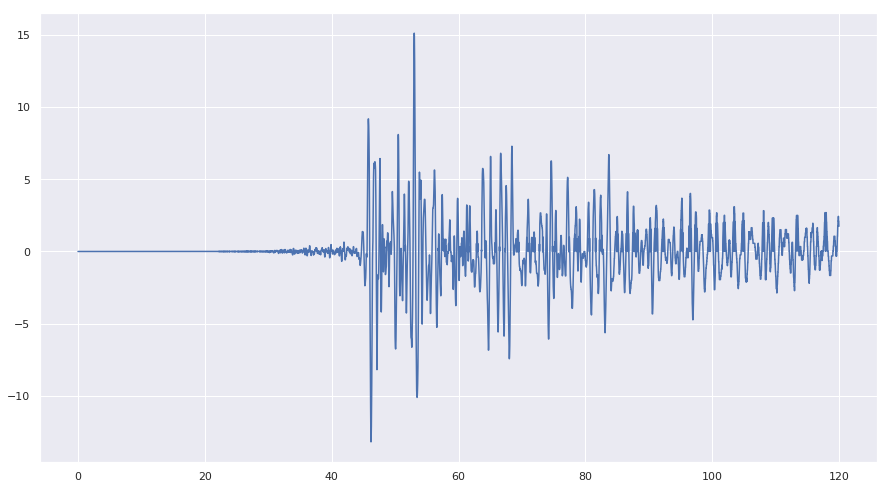

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8.27)})
# sns.lineplot(time, acc)
sns.lineplot(time, u)

---

In [29]:
tainan_station.station_name.unique()

array(['Qigu', 'Jiaxian', 'Shanhua', 'Yongkang', 'Caoshan', 'Dongshan',
       'Xinhua', 'Jiali', 'Nanxi', 'Dapu', 'Tainan City', 'Yizhu',
       'Qishan', 'Liugui', '嘉南國小', '新庄國小', '仁光國小', '塭內國小', '德高國小'],
      dtype=object)

In [33]:
tainan_station[tainan_station.station_longitude == 120.6460]

,index,amplitude_unit,depth,ea,epicenter_latitude,epicenter_longitude,instrument_kind,magnitude,na,origin_time,...,ua,e_PGA,e_PGV,e_PGD,n_PGA,n_PGV,n_PGD,u_PGA,u_PGV,u_PGD
278,1971,gal. DCoffset(corr),31.3,"[0.0, -0.001, 0.002, -0.001, 0.004, 0.002, -0....",24.00,122.64,FBA,6.0,"[-0.002, -0.002, -0.002, 0.002, 0.003, -0.002,...",2018/10/23-12:34:58,...,"[0.002, -0.003, 0.003, 0.001, 0.002, 0.001, -0...",0.942002,0.601128,0.383602,0.884032,0.562128,0.357433,0.385430,0.262269,0.190431
516,5094,gal. DCoffset(corr),19.1,"[0.006, 0.001, -0.004, -0.003, 0.005, 0.0, -0....",24.02,121.00,FBA,5.2,"[0.0, 0.0, -0.003, 0.003, 0.0, -0.001, 0.001, ...",2018/08/18-08:15:17,...,"[-0.002, 0.002, 0.003, 0.0, -0.001, -0.001, 0....",1.007998,0.389403,0.150422,0.785033,0.306715,0.119841,0.331087,0.131799,0.052467


In [34]:
tainan_station.iloc[278]

index                                                               1971
amplitude_unit                                       gal. DCoffset(corr)
depth                                                               31.3
ea                     [0.0, -0.001, 0.002, -0.001, 0.004, 0.002, -0....
epicenter_latitude                                                    24
epicenter_longitude                                               122.64
instrument_kind                                                      FBA
magnitude                                                              6
na                     [-0.002, -0.002, -0.002, 0.002, 0.003, -0.002,...
origin_time                                          2018/10/23-12:34:58
record_length                                                         80
sample_rate                                                          100
start_time                                       2018/10/23-12:35:00.000
station_code                                       

In [31]:
np.sort(tainan_station.origin_time.unique())

array(['2017/01/04-15:07:21', '2017/01/12-01:31:03',
       '2017/01/13-01:46:42', '2017/01/25-15:33:06',
       '2017/02/11-01:12:52', '2017/02/11-01:15:40',
       '2017/02/12-12:30:58', '2017/03/08-06:10:51',
       '2017/03/24-01:09:25', '2017/03/25-23:02:58',
       '2017/03/30-00:34:02', '2017/04/17-02:34:16',
       '2017/04/30-09:57:22', '2017/05/16-07:12:54',
       '2017/05/24-17:49:03', '2017/05/24-21:10:54',
       '2017/05/25-13:48:11', '2017/05/25-13:48:12',
       '2017/06/16-05:29:18', '2017/06/22-07:36:04',
       '2017/07/18-03:16:26', '2017/07/30-09:00:07',
       '2017/08/10-00:05:36', '2017/08/11-09:58:54',
       '2017/09/20-22:29:56', '2017/09/20-22:29:57',
       '2017/10/26-01:23:55', '2017/11/03-10:48:15',
       '2017/11/03-10:48:59', '2017/11/04-07:34:48',
       '2017/11/07-01:36:40', '2017/11/11-19:14:39',
       '2017/11/11-20:13:04', '2017/11/11-20:22:53',
       '2017/11/11-20:24:43', '2017/11/11-21:39:38',
       '2017/11/22-22:20:09', '2017/11/23-06:1

In [32]:
tainan_station.origin_time.unique().shape

(91,)

In [56]:
coord = pd.DataFrame({'count':tainan_station.groupby(['station_latitude', 'station_longitude']).size()})
coord.reset_index(inplace = True)

In [80]:
coord.head()

,station_latitude,station_longitude,count
0,22.8860,120.4940,6
1,22.9629,120.2358,1
2,22.9889,120.5599,26
3,22.9930,120.2050,37
4,22.9930,120.6460,2


In [92]:
station = []
for i in range(coord.shape[0]):
    station.append(tainan_station[(tainan_station.station_latitude == coord.iloc[i].station_latitude) & 
                  (tainan_station.station_longitude == coord.iloc[i].station_longitude)] \
                   .station_name.unique().tolist()[0])
coord['station'] = station

In [166]:
coord.head()

,station_latitude,station_longitude,count,station
0,22.8860,120.4940,6,Qishan
1,22.9629,120.2358,1,德高國小
2,22.9889,120.5599,26,新庄國小
3,22.9930,120.2050,37,Tainan City
4,22.9930,120.6460,2,Liugui


In [57]:
presentations = ['todegdec', 'todms', 'todmsstr', 'tomindec', 'tomindecstr']
__all__ = ['towgs84', 'fromwgs84'] + presentations

from math import radians, degrees, pow, sin, cos, sinh, cosh, asin, acos, atan, atanh

import argparse
import re
import sys

"""
Based on http://www.gps.moi.gov.tw/SSCenter/Introduce/IntroducePage.aspx?Page=GPS9
TWD97 has E0 = 250000m, k0 = 0.9999, a = 6378137m, lng0 = 121 and f = 1 / 298.257222101
If it is in Penghu, Kinmen or Matsu, lng0 should be 119
The formulas are based on http://en.wikipedia.org/wiki/Universal_transverse_Mercator
"""

a = 6378.137
f = 1 / 298.257222101
k0 = 0.9999
N0 = 0
E0 = 250.000
lng0 = radians(121)
lng0pkm = radians(119)

n = f / (2-f)
A = a / (1+n) * (1 + pow(n,2)/4.0 + pow(n,4)/64.0)
alpha1 = n/2 - 2*pow(n,2)/3.0 + 5*pow(n,3)/16.0
alpha2 = 13*pow(n,2)/48.0 - 3*pow(n,3)/5.0
alpha3 = 61*pow(n,3)/240.0
beta1 = n/2 - 2*pow(n,2)/3.0 + 37*pow(n,3)/96.0
beta2 = pow(n,2)/48.0 + pow(n,3)/15.0
beta3 = 17*pow(n,3)/480.0
delta1 = 2*n - 2*pow(n,2)/3.0 - 2*pow(n,3)
delta2 = 7*pow(n,2)/3.0 - 8*pow(n,3)/5.0
delta3 = 56*pow(n,3)/15.0

dms_re = re.compile(u'(?P<degrees>[\+\-]?[0-9]+)°\s?(?P<minutes>\d+)\'\s?(?P<seconds>[0-9.]+)"')
mindec_re = re.compile(u'(?P<degrees>[\+\-]?[0-9]+)°\s?(?P<minutes>[0-9.]+)\'')

def todegdec(origin):
    """
    Convert from [+/-]DDD°MMM'SSS.SSSS" or [+/-]DDD°MMM.MMMM' to [+/-]DDD.DDDDD
    """

    # if the input is already a float (or can be converted to float)
    try:
        return float(origin)
    except ValueError:
        pass

    # DMS format
    m = dms_re.search(origin)
    if m:
        degrees = int(m.group('degrees'))
        minutes = float(m.group('minutes'))
        seconds = float(m.group('seconds'))

        return degrees + minutes / 60 + seconds / 3600

    # Degree + Minutes format
    m = mindec_re.search(origin)
    if m:
        degrees = int(m.group('degrees'))
        minutes = float(m.group('minutes'))

        return degrees + minutes / 60

def tomindec(origin):
    """
    Convert [+/-]DDD.DDDDD to a tuple (degrees, minutes)
    """

    origin = float(origin)
    degrees = int(origin)
    minutes = (origin % 1) * 60

    return degrees, minutes

def tomindecstr(origin):
    """
    Convert [+/-]DDD.DDDDD to [+/-]DDD°MMM.MMMM'
    """

    degrees, minutes = tomindec(origin)
    return u'%d°%f\'' % (degrees, minutes)

def todms(origin):
    """
    Convert [+/-]DDD.DDDDD to a tuple (degrees, minutes, seconds)
    """

    degrees, minutes = tomindec(origin)
    seconds = (minutes % 1) * 60

    return degrees, int(minutes), seconds

def todmsstr(origin):
    """
    Convert [+/-]DDD.DDDDD to [+/-]DDD°MMM'DDD.DDDDD"
    """

    degrees, minutes, seconds = todms(origin)
    return u'%d°%d\'%f"' % (degrees, minutes, seconds)

def towgs84(E, N, pkm=False, presentation=None):
    """
    Convert coordintes from TWD97 to WGS84
    The east and north coordinates should be in meters and in float
    pkm true for Penghu, Kinmen and Matsu area
    You can specify one of the following presentations of the returned values:
        dms - A tuple with degrees (int), minutes (int) and seconds (float)
        dmsstr - [+/-]DDD°MMM'DDD.DDDDD" (unicode)
        mindec - A tuple with degrees (int) and minutes (float)
        mindecstr - [+/-]DDD°MMM.MMMMM' (unicode)
        (default)degdec - DDD.DDDDD (float)
    """

    _lng0 = lng0pkm if pkm else lng0

    E /= 1000.0
    N /= 1000.0
    epsilon = (N-N0) / (k0*A)
    eta = (E-E0) / (k0*A)

    epsilonp = epsilon - beta1*sin(2*1*epsilon)*cosh(2*1*eta) - \
                         beta2*sin(2*2*epsilon)*cosh(2*2*eta) - \
                         beta3*sin(2*3*epsilon)*cosh(2*3*eta)
    etap = eta - beta1*cos(2*1*epsilon)*sinh(2*1*eta) - \
                 beta2*cos(2*2*epsilon)*sinh(2*2*eta) - \
                 beta3*cos(2*3*epsilon)*sinh(2*3*eta)
    sigmap = 1 - 2*1*beta1*cos(2*1*epsilon)*cosh(2*1*eta) - \
                 2*2*beta2*cos(2*2*epsilon)*cosh(2*2*eta) - \
                 2*3*beta3*cos(2*3*epsilon)*cosh(2*3*eta)
    taup = 2*1*beta1*sin(2*1*epsilon)*sinh(2*1*eta) + \
           2*2*beta2*sin(2*2*epsilon)*sinh(2*2*eta) + \
           2*3*beta3*sin(2*3*epsilon)*sinh(2*3*eta)

    chi = asin(sin(epsilonp) / cosh(etap))

    latitude = chi + delta1*sin(2*1*chi) + \
                     delta2*sin(2*2*chi) + \
                     delta3*sin(2*3*chi)

    longitude = _lng0 + atan(sinh(etap) / cos(epsilonp))

    func = None
    presentation = 'to%s' % presentation if presentation else None
    if presentation in presentations:
        func = getattr(sys.modules[__name__], presentation)

    if func and func != 'todegdec':
        return func(degrees(latitude)), func(degrees(longitude))

    return (degrees(latitude), degrees(longitude))

def fromwgs84(lat, lng, pkm=False):
    """
    Convert coordintes from WGS84 to TWD97
    pkm true for Penghu, Kinmen and Matsu area
    The latitude and longitude can be in the following formats:
        [+/-]DDD°MMM'SSS.SSSS" (unicode)
        [+/-]DDD°MMM.MMMM' (unicode)
        [+/-]DDD.DDDDD (string, unicode or float)
    The returned coordinates are in meters
    """

    _lng0 = lng0pkm if pkm else lng0

    lat = radians(todegdec(lat))
    lng = radians(todegdec(lng))

    t = sinh((atanh(sin(lat)) - 2*pow(n,0.5)/(1+n)*atanh(2*pow(n,0.5)/(1+n)*sin(lat))))
    epsilonp = atan(t/cos(lng-_lng0))
    etap = atan(sin(lng-_lng0) / pow(1+t*t, 0.5))

    E = E0 + k0*A*(etap + alpha1*cos(2*1*epsilonp)*sinh(2*1*etap) + 
                          alpha2*cos(2*2*epsilonp)*sinh(2*2*etap) +
                          alpha3*cos(2*3*epsilonp)*sinh(2*3*etap))
    N = N0 + k0*A*(epsilonp + alpha1*sin(2*1*epsilonp)*cosh(2*1*etap) +
                              alpha2*sin(2*2*epsilonp)*cosh(2*2*etap) +
                              alpha3*sin(2*3*epsilonp)*cosh(2*3*etap))

    return E*1000, N*1000

In [58]:
coord.head()

,station_latitude,station_longitude,count
0,22.8860,120.4940,6
1,22.9629,120.2358,1
2,22.9889,120.5599,26
3,22.9930,120.2050,37
4,22.9930,120.6460,2


In [63]:
coor = pd.DataFrame()
coor = coord.apply(lambda x: fromwgs84(x['station_latitude'], x['station_longitude']), axis=1)

xcoor = []
ycoor = []
for i in coor:
    xcoor.append(i[0])
    ycoor.append(i[1])

df_coor = pd.DataFrame()
df_coor['97lat'] = ycoor
df_coor['97long'] = xcoor

In [65]:
from shapely.geometry import Point

bank_points = df_coor[['97long', '97lat']].astype(float).apply(lambda row:
              Point(row["97long"], row["97lat"]), axis=1)

In [94]:
geo_banks = gp.GeoDataFrame({"geometry": bank_points,
            "bank_names": coord.station})

In [66]:
import matplotlib.pyplot as plt
import geopandas as gp
import numpy as np
%matplotlib inline  

villages_shp = gp.read_file("./data/geographicPlot/VILLAGE_MOI_121_1071031.shp", encoding='utf8') #全台灣村里界圖
tainan_shp = villages_shp.query('COUNTYNAME=="臺南市"') #臺中市村里界圖

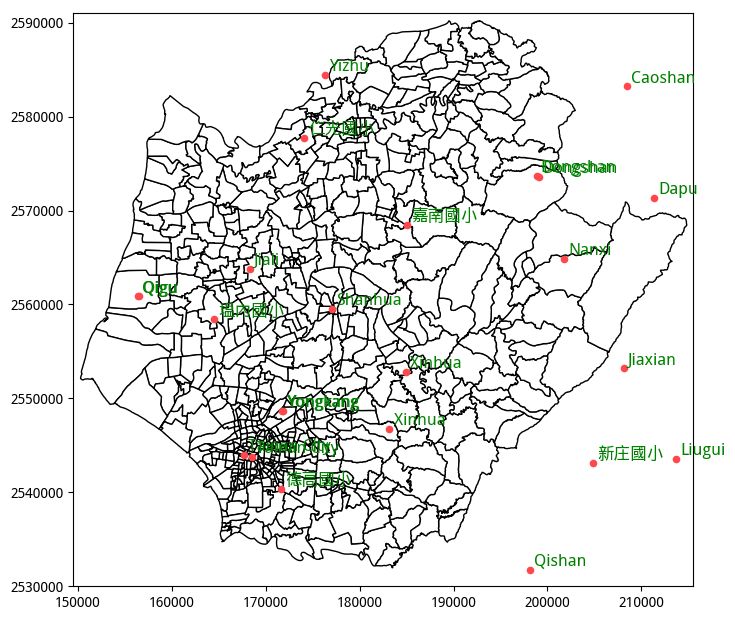

In [164]:
plt.rcParams['font.family'] = "Droid Sans Fallback"
plt.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box

# We restrict to South America.
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 100

ax = tainan_shp.plot(color='white', edgecolor='black')

# We can now plot our GeoDataFrame.

geo_banks.plot(ax=ax, color='xkcd:light red', marker='o', markersize=20)

# ax = geo_banks.plot()

for x, y, label in zip(geo_banks.geometry.x, geo_banks.geometry.y, geo_banks.bank_names):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",
                color='green', fontsize=12)

# ylim((, ))
axes = plt.gca()
axes.set_xlim([149500,215500])
axes.set_ylim([2530000,2591000])
plt.show()

In [167]:
coord

,station_latitude,station_longitude,count,station
0,22.8860,120.4940,6,Qishan
1,22.9629,120.2358,1,德高國小
2,22.9889,120.5599,26,新庄國小
3,22.9930,120.2050,37,Tainan City
4,22.9930,120.6460,2,Liugui
5,22.9950,120.1970,4,Tainan City
6,23.0210,120.3480,3,Xinhua
7,23.0380,120.2360,4,Yongkang
8,23.0380,120.2370,39,Yongkang
9,23.0760,120.3650,54,Xinhua


---

In [183]:
duplicated_index = [5, 7, 14, 20]
remap_index = [3, 8, 13, 19]

duplicated_lat = []
remap_lat = []

duplicated_long = []
remap_long = []
for i in range(len(duplicated_index)):
    di = duplicated_index[i]
    duplicated_lat.append(coord.iloc[di].station_latitude)
    duplicated_long.append(coord.iloc[di].station_longitude)
    
    mi = remap_index[i]
    remap_lat.append(coord.iloc[mi].station_latitude)
    remap_long.append(coord.iloc[mi].station_longitude)

In [184]:
duplicated_long

[120.197, 120.236, 120.087, 120.5]

In [211]:
for lat, long, re_lat, re_long in zip(duplicated_lat, duplicated_long, remap_lat, remap_long):
    index = tainan_station[(tainan_station.station_latitude == lat) &
                           (tainan_station.station_longitude == long)].index
    
    for i in index:
        tainan_station.at[i, 'station_latitude'] = re_lat
        tainan_station.at[i, 'station_longitude'] = re_long

In [212]:
coord = pd.DataFrame({'count':tainan_station.groupby(['station_latitude', 'station_longitude']).size()})
coord.reset_index(inplace = True)

In [213]:
station = []
for i in range(coord.shape[0]):
    station.append(tainan_station[(tainan_station.station_latitude == coord.iloc[i].station_latitude) & 
                  (tainan_station.station_longitude == coord.iloc[i].station_longitude)] \
                   .station_name.unique().tolist()[0])
coord['station'] = station

In [214]:
coor = pd.DataFrame()
coor = coord.apply(lambda x: fromwgs84(x['station_latitude'], x['station_longitude']), axis=1)

xcoor = []
ycoor = []
for i in coor:
    xcoor.append(i[0])
    ycoor.append(i[1])

df_coor = pd.DataFrame()
df_coor['97lat'] = ycoor
df_coor['97long'] = xcoor

In [215]:
from shapely.geometry import Point

bank_points = df_coor[['97long', '97lat']].astype(float).apply(lambda row:
              Point(row["97long"], row["97lat"]), axis=1)

In [216]:
geo_banks = gp.GeoDataFrame({"geometry": bank_points,
            "bank_names": coord.station})

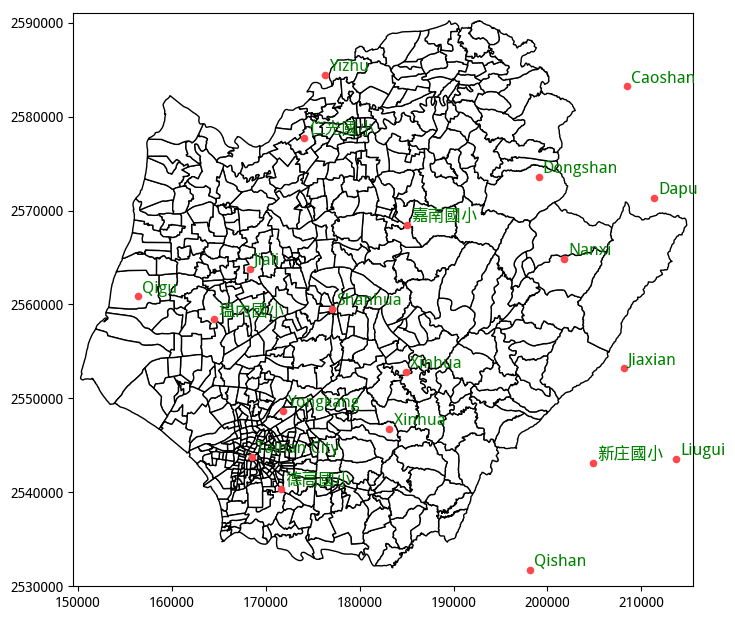

In [217]:
plt.rcParams['font.family'] = "Droid Sans Fallback"
plt.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box

# We restrict to South America.
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 100

ax = tainan_shp.plot(color='white', edgecolor='black')

# We can now plot our GeoDataFrame.

geo_banks.plot(ax=ax, color='xkcd:light red', marker='o', markersize=20)

# ax = geo_banks.plot()

for x, y, label in zip(geo_banks.geometry.x, geo_banks.geometry.y, geo_banks.bank_names):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",
                color='green', fontsize=12)

# ylim((, ))
axes = plt.gca()
axes.set_xlim([149500,215500])
axes.set_ylim([2530000,2591000])
plt.show()

In [218]:
coord

,station_latitude,station_longitude,count,station
0,22.8860,120.4940,6,Qishan
1,22.9629,120.2358,1,德高國小
2,22.9889,120.5599,26,新庄國小
3,22.9930,120.2050,41,Tainan City
4,22.9930,120.6460,2,Liugui
5,23.0210,120.3480,3,Xinhua
6,23.0380,120.2370,43,Yongkang
7,23.0760,120.3650,54,Xinhua
8,23.0800,120.5910,35,Jiaxian
9,23.1253,120.1651,20,塭內國小
